<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea6/ejercicios_teorema_de_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def total(probabilidades_apriori, probabilidades_condicional):
  return np.dot(probabilidades_apriori,probabilidades_condicional)

In [32]:
a=np.array([0.5,0.3,0.45])
b=np.array([0.3,0.2,0.5])

In [33]:
totaal=total(a,b)
totaal

0.435

In [34]:
def bayes(total,Ai,Ai_tal_que):
  return Ai*Ai_tal_que/total

In [36]:
bayes(totaal,0.3,0.2)

0.13793103448275862

In [37]:
#Un medico ha observado que el 40% de sus pacientes fuma. De este 40% el 75% son
#hombres. Entre los pacientes que no fuman, el 60% son mujeres. Si se selecciona un
#paciente al azar:

In [38]:
h_sobre_f=0.75
m_sobre_f=0.25
m_sobre_Nf=0.6
H_sobreNf=0.4
f=0.4
Nf=0.6

In [40]:
#probabilidad de mujer
P_M=total(np.array([m_sobre_Nf,m_sobre_f]),np.array([Nf,f]))
P_M

0.45999999999999996

In [42]:
#hombre fumador
f*h_sobre_f

0.30000000000000004

In [43]:
#mujer fume
bayes(P_M,f,m_sobre_f)

0.2173913043478261

In [86]:
#Punto 2
#distribucion promedio punto entre el numero de suceso y su probabilidad
h=np.array([1,2,3,4])
PH=np.array([0.4,0.3,0.2,0.1])
landas=np.array([1,2,3,4])
h@PH

2.0

In [87]:
from scipy.special import factorial
def poison (x,landa):
  return np.exp(-landa)*(landa**x)/factorial(x)

In [97]:
#verisimilitud para cada landa sabiendo que se observaron 4 estudiantes
j=poison(4,landas)
j


array([0.01532831, 0.09022352, 0.16803136, 0.19536681])

In [101]:
#"probabilidad todal" o producto punto entre la verisimilitud de cada landa con su probabilidad
I=total(poison(4,landas),PH)
I

0.0863413332964712

In [107]:
Y=j*PH/I #distribucion posterior para cada landa, el mejor que lo describe es landa=3
Y

array([0.07101262, 0.31348898, 0.38922576, 0.22627264])

In [108]:
np.sum(Y)#efectivamente esta

1.0

In [112]:
#mejor landa esperado
total(landas,Y)

2.7707584253176796

In [113]:
#ya que la probabilidad de dos eventos independientes es el producto de sus probabilidades, el likelihood de dos observaciones independientes
#es la multiplicacion de sus verisimilitudes

In [124]:
def poisoon2(x,landa):
  Z=1
  for i in range(len(x)):
    Z*=np.exp(-landa)*(landa**x[i])/factorial(x[i])
  return Z

In [133]:
#a el landa inicial porque la prediccion a priori no cambia
#Landa=2.0
#B
#verisimilitud para cada landa sabiendo que se observaron 4 estudiantes y el otro dia se observaron 5
VERI=poisoon2([4,5],landas)
VERI

array([4.69914178e-05, 3.25611358e-03, 1.69407219e-02, 3.05345539e-02])

In [134]:
#producto punto entre verisimilitudes con likelihood conjunto
S=total(VERI,PH)
S

0.007437230409082155

In [148]:
#calculo de las posteriores, el mejor que lo describe es landa =3
HH=VERI*PH/S
HH

array([0.00252736, 0.1313438 , 0.45556534, 0.41056351])

In [149]:
#comprobar normalizacion

In [150]:
np.sum(HH)

1.0

In [151]:
#mejor parametro
total(landas,HH)

3.274164986959538

In [152]:
np.sum(D)

1.0

In [153]:
#densidad apriori
[electron,proton,alpha]=[0.9,0.6,0.2]

In [154]:
#4
PD_e=0.9
PD_p=0.6
PD_a=0.2
#como el flujo de electrones es dos veces mayor al flujo de protonos y particulas alfa entonces:
Pe=0.5
Pa=0.25
Pp=0.25
#probabilidad a prior de deteccion
PD=total(np.array([PD_e,PD_p,PD_a]),np.array([Pe,Pp,Pa]))
PD


0.65

In [155]:
#4
#probabilidad de detectar cada particula[e,p,a]
D=np.array([0.9,0.6,0.2])*np.array([0.5,0.25,0.25])/0.65
D

array([0.69230769, 0.23076923, 0.07692308])

<StemContainer object of 3 artists>

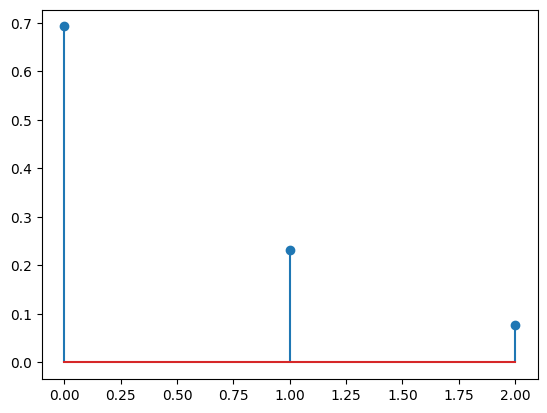

In [158]:
plt.stem(D)